# Pyber Challenge



In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

# Load in csv
pyber_ride_df = pd.read_csv("Resources/PyBer_ride_data.csv")
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


In [2]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
# Load in csv
ride_data_df = pd.read_csv("Resources/ride_data.csv")
city_data_df = pd.read_csv("Resources/city_data.csv")

In [3]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

### Merge DataFrames
Before we merge the DataFrames, let’s review each DataFrame.

The columns in the city_data_df DataFrame are:

- city
- driver_count
- type

The columns in the ride_data_df are:

- city
- date
- fare
- ride_id

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [7]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Calculate the percentage of drivers for each city type.
driver_counts = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_counts

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [12]:
total_fares = pyber_data_df.groupby(['type']).sum()['fare']

In [13]:
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']

In [14]:
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [16]:
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [17]:
average_fare_per_driver = total_fares / total_drivers

In [18]:
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [19]:
average_fare_per_ride = total_fares / total_rides

In [20]:
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [21]:
type(total_drivers)

pandas.core.series.Series

In [22]:
##column labets , 
#Combihne series into a summary dataframe
summary_df = pd.concat([total_rides, total_drivers, total_fares, average_fare_per_ride, average_fare_per_driver], axis=1)

In [23]:
summary_df

,ride_id,driver_count,fare,0,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [61]:
# Note the numbers 0 and 1 are not in parentheses to allow pandas to recognize it as a number instead of a string
summary_df = summary_df.rename(columns={'ride_id':'Total Rides', 'driver_count': 'Total Drivers', 'fare': 'Total Fares', 0 :'Average Fare per Ride', 1:'Average Fare per Driver'})


In [62]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [65]:
#Remove Index name
summary_df.index.name = None
# changing formatting using the df.style.format() method
summary_df_formatted = summary_df.style.format({'Total Rides': '{:,.0f}', 'Total Drivers':'{:,.0f}','Total Fares':'${:,.02f}', 'Average Fare per Ride':'${:,.02f}', 'Average Fare per Driver':'${:,.02f}'})

In [95]:
#Remove index name
summary_df_formatted.index.name = None


## Technical Analysis Deliverable 1: 
    
A summary DataFrame of the key metrics for the ride-sharing data by city type.

In [ ]:
summary_df_formatted

In [67]:
pyber_data_df = pyber_data_df.rename(columns={ 'date':'Date','city':'City','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [68]:
pyber_date_indexed = pyber_data_df.set_index('Date').copy()

In [69]:
pyber_date_indexed.index = pd.to_datetime(pyber_date_indexed.index)

In [70]:
pyber_date_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride Id      2375 non-null   int64  
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [71]:
pyber_city_fare_df = pyber_date_indexed[['City Type', 'Fare']]

In [72]:
pyber_city_fare_df


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [73]:
pyber_city_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [74]:
pyber_city_fare = pyber_city_fare_df.groupby(['Date', 'City Type']).sum().reset_index()

In [75]:
pyber_city_fare

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [76]:
pyber_city_fare = pyber_city_fare.set_index('Date')

In [77]:
pyber_city_fare

,City Type,Fare
Date,,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [78]:
pyber_city_fare_pivot = pyber_city_fare.pivot_table(index='Date', columns='City Type', values = 'Fare')

In [79]:
#Create a pivot table with city type as column
pyber_city_fare_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [80]:
#Create dataframe based on the the given dates
pyber_city_fare_pivot2 = pyber_city_fare_pivot.loc['2019-01-01':'2019-04-28']

In [81]:
pyber_city_fare_pivot2

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [82]:
pyber_city_resampled = pyber_city_fare_pivot2.resample('W').sum()

In [83]:
pyber_city_resampled

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Technical Analysis Deliverable 2:

A multi-line chart, one line for each city type, that shows the sum of the fares for each week.


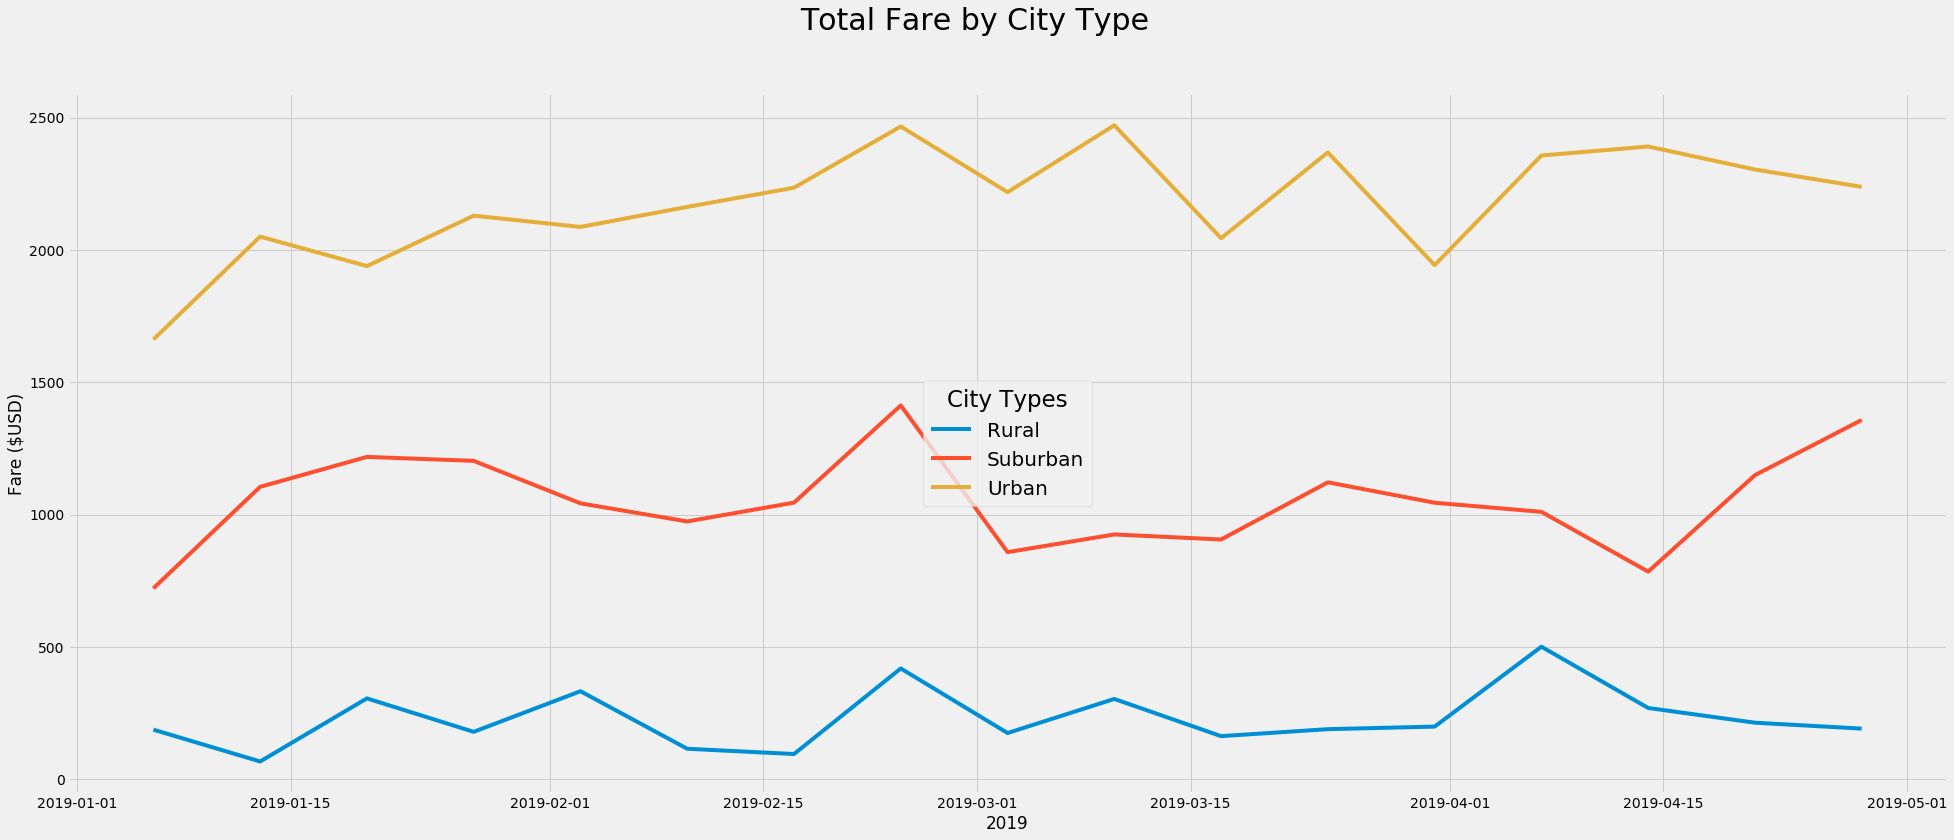

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

week = pyber_city_resampled.index.tolist()
    
#set the 538 style
plt.style.use('fivethirtyeight')

#set the size of the plot
fig, ax = plt.subplots(figsize=(30,12))

#set the title size
fig.suptitle('Total Fare by City Type', fontsize=30)

#plot each city type
ax1 = sns.lineplot(x= pyber_city_resampled.index, y=pyber_city_resampled['Rural'].tolist())
ax2 = sns.lineplot(x= pyber_city_resampled.index, y=pyber_city_resampled['Suburban'].tolist())
ax3 = sns.lineplot(x= pyber_city_resampled.index, y=pyber_city_resampled['Urban'].tolist())
ax.set(xlabel='2019', ylabel='Fare ($USD)')

# # Define the date format
date_form = DateFormatter("%b")

# Create legend
legend = plt.legend(fontsize='20', mode='Expanded', loc='center', title='City Types', labels=['Rural', 'Suburban', 'Urban'])
#change legend title
legend.get_title().set_fontsize('23')
#Save Figure
fig.savefig("analysis/Fig7.png")
plt.show()